<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Outils-projet" data-toc-modified-id="Outils-projet-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Outils projet</a></span></li><li><span><a href="#La-lecture-de-l'échantillon-initial" data-toc-modified-id="La-lecture-de-l'échantillon-initial-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>La lecture de l'échantillon initial</a></span></li><li><span><a href="#La-separation-des-données-pour-l'apprentissage" data-toc-modified-id="La-separation-des-données-pour-l'apprentissage-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>La separation des données pour l'apprentissage</a></span></li><li><span><a href="#Le-déclaration-des-classifieurs" data-toc-modified-id="Le-déclaration-des-classifieurs-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Le déclaration des classifieurs</a></span></li><li><span><a href="#Le-choix-des-classifieurs" data-toc-modified-id="Le-choix-des-classifieurs-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Le choix des classifieurs</a></span></li><li><span><a href="#L'ajout-des-variables" data-toc-modified-id="L'ajout-des-variables-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>L'ajout des variables</a></span></li><li><span><a href="#Le-traitement-des-outliers" data-toc-modified-id="Le-traitement-des-outliers-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Le traitement des outliers</a></span></li></ul></div>

>> **Vous trouvez les données et leur description :**<br>
>> https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29<br>
>> https://www.kaggle.com/uciml/breast-cancer-wisconsin-data<br>

In [1]:
import pandas as pd              
import seaborn as sns  
import os, warnings

%pylab inline

plt.style.use('seaborn-darkgrid')
sns.set(font_scale=2)
warnings.filterwarnings(action="ignore")

Populating the interactive namespace from numpy and matplotlib


# Outils projet

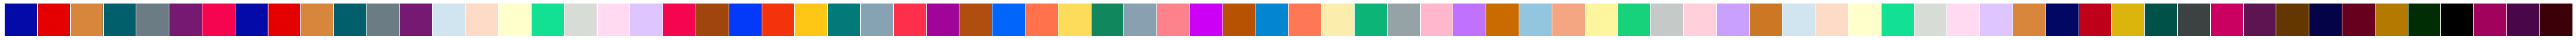

In [26]:
palette = [ "#030aa7", "#e50000", "#d8863b", "#005f6a", "#6b7c85", "#751973",
            "#f5054f", 
            "#030aa7", "#e50000", "#d8863b", "#005f6a", "#6b7c85", "#751973", "#d1e5f0", "#fddbc7",
            "#ffffcb", "#12e193", "#d8dcd6", "#ffdaf0", "#dfc5fe", "#f5054f", "#a0450e",
            "#0339f8", "#f4320c", "#fec615", "#017a79", "#85a3b2", "#fe2f4a", "#a00498", "#b04e0f",
            "#0165fc", "#ff724c", "#fddc5c", "#11875d", "#89a0b0", "#fe828c", "#cb00f5", "#b75203",
            "#0485d1", "#ff7855", "#fbeeac", "#0cb577", "#95a3a6", "#ffb7ce", "#c071fe", "#ca6b02",
            "#92c5de", "#f4a582", "#fef69e", "#18d17b", "#c5c9c7", "#ffcfdc", "#caa0ff", "#cb7723",
            "#d1e5f0", "#fddbc7", "#ffffcb", "#12e193", "#d8dcd6", "#ffdaf0", "#dfc5fe", "#d8863b",
            "#030764", "#be0119", "#dbb40c", "#005249", "#3c4142", "#cb0162", "#5d1451", "#653700",
            "#040348", "#67001f", "#b27a01", "#002d04", "#000000", "#a0025c", "#490648", "#3c0008"
          ]
paletteA = ['#b2182b','#008827','#053061','#ffa500', '#34495e', '#e74c3c', 
          '#9b59b6', '#0165fc','#2ecc71', '#cb7723', '#89a0b0']
sns.palplot(sns.color_palette(palette))

In [3]:
from datetime import datetime as dt

repertoireRacine  = '.'
nomProjet         = 'Présentation_Breast_Cancer_Wisconsin'

repertoireProjet  = os.path.join(repertoireRacine, nomProjet)
repertoireDonnees = os.path.join(repertoireProjet, 'repertoire.donnees')
repertoireImages  = os.path.join(repertoireProjet, 'repertoire.images')


def controleExistenceRepertoire( repertoire, create_if_needed=True):
    """Voir si le répertoire existe. S'il n'existe pas il est créé."""
    path_exists = os.path.exists(repertoire)
    if path_exists:
        if not os.path.isdir(repertoire):
            raise Exception("Trouvé le nom  "+repertoire +" mais c'est un fichier, pas un répertoire")
            # return False
        return True
    if create_if_needed:
        os.makedirs(repertoire)

def sauvegarderImage( fichier):
    """Enregistrez la figure. Appelez la méthode juste avant plt.show ()."""
    controleExistenceRepertoire(repertoireImages)
    plt.savefig(os.path.join(repertoireImages,
                             fichier+f"--{dt.now().strftime('%Y_%m_%d_%H.%M.%S')}.png"), 
                             dpi=600, 
                             bbox_inches='tight')

def sauvegarderImageSNS( sns_plot, fichier):
    """Enregistrez la figure. Appelez la méthode juste avant plt.show ()."""
    controleExistenceRepertoire(repertoireImages)
    fig = sns_plot.get_figure()
    fig.savefig(os.path.join(repertoireImages,fichier+'.png'))
    
controleExistenceRepertoire(repertoireProjet);
controleExistenceRepertoire(repertoireDonnees);
controleExistenceRepertoire(repertoireImages);

In [4]:
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import NuSVC, SVC, OneClassSVM
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import ConstantKernel, RBF, RationalQuadratic, ExpSineSquared, DotProduct, Matern, WhiteKernel

from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB, ComplementNB
from lightgbm import LGBMClassifier
from xgboost  import XGBClassifier
from sklearn.metrics import roc_curve, auc

from sklearn.metrics  import make_scorer, confusion_matrix, roc_curve, auc, accuracy_score, log_loss, hamming_loss, \
                             precision_score, recall_score, f1_score, jaccard_score,  \
                             precision_recall_curve, average_precision_score

In [5]:
from sklearn.preprocessing import LabelEncoder


# La lecture de l'échantillon initial


<img src="https://raw.githubusercontent.com/rbizoi/IntelligenceEnDonneesDeSante/main/images/EchantillonInitial.png" width="800">

In [6]:
nomsDiag = {'M':1,'B':0}
nomsDiagInv = {1:'M',0:'B'}
breastCancer = pd.read_csv('../donnees/Breast Cancer Wisconsin (Diagnostic)/breastCancer.csv', index_col='id').drop(columns='Unnamed: 32')
breastCancer.diagnosis = breastCancer.diagnosis.apply(lambda x : nomsDiag[x])
breastCancer.columns = [nom.replace(' ','_') for nom in breastCancer.columns]
breastCancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
breastCancer.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


for i in breastCancer.drop(columns='diagnosis'):
    plt.figure(figsize=(14,12))
    plt.title(i)
    sns.distplot(breastCancer[i][breastCancer.diagnosis == 1],
                   color="steelblue", label='M')
    sns.distplot(breastCancer[i][breastCancer.diagnosis == 0],
                   color="red", label='B')
    plt.legend();  
    sauvegarderImage( f'Distribution colonne {i}')
    plt.show()

In [8]:
sns.set(font_scale=2)

In [9]:
X = breastCancer.drop(columns='diagnosis')
y = breastCancer.diagnosis

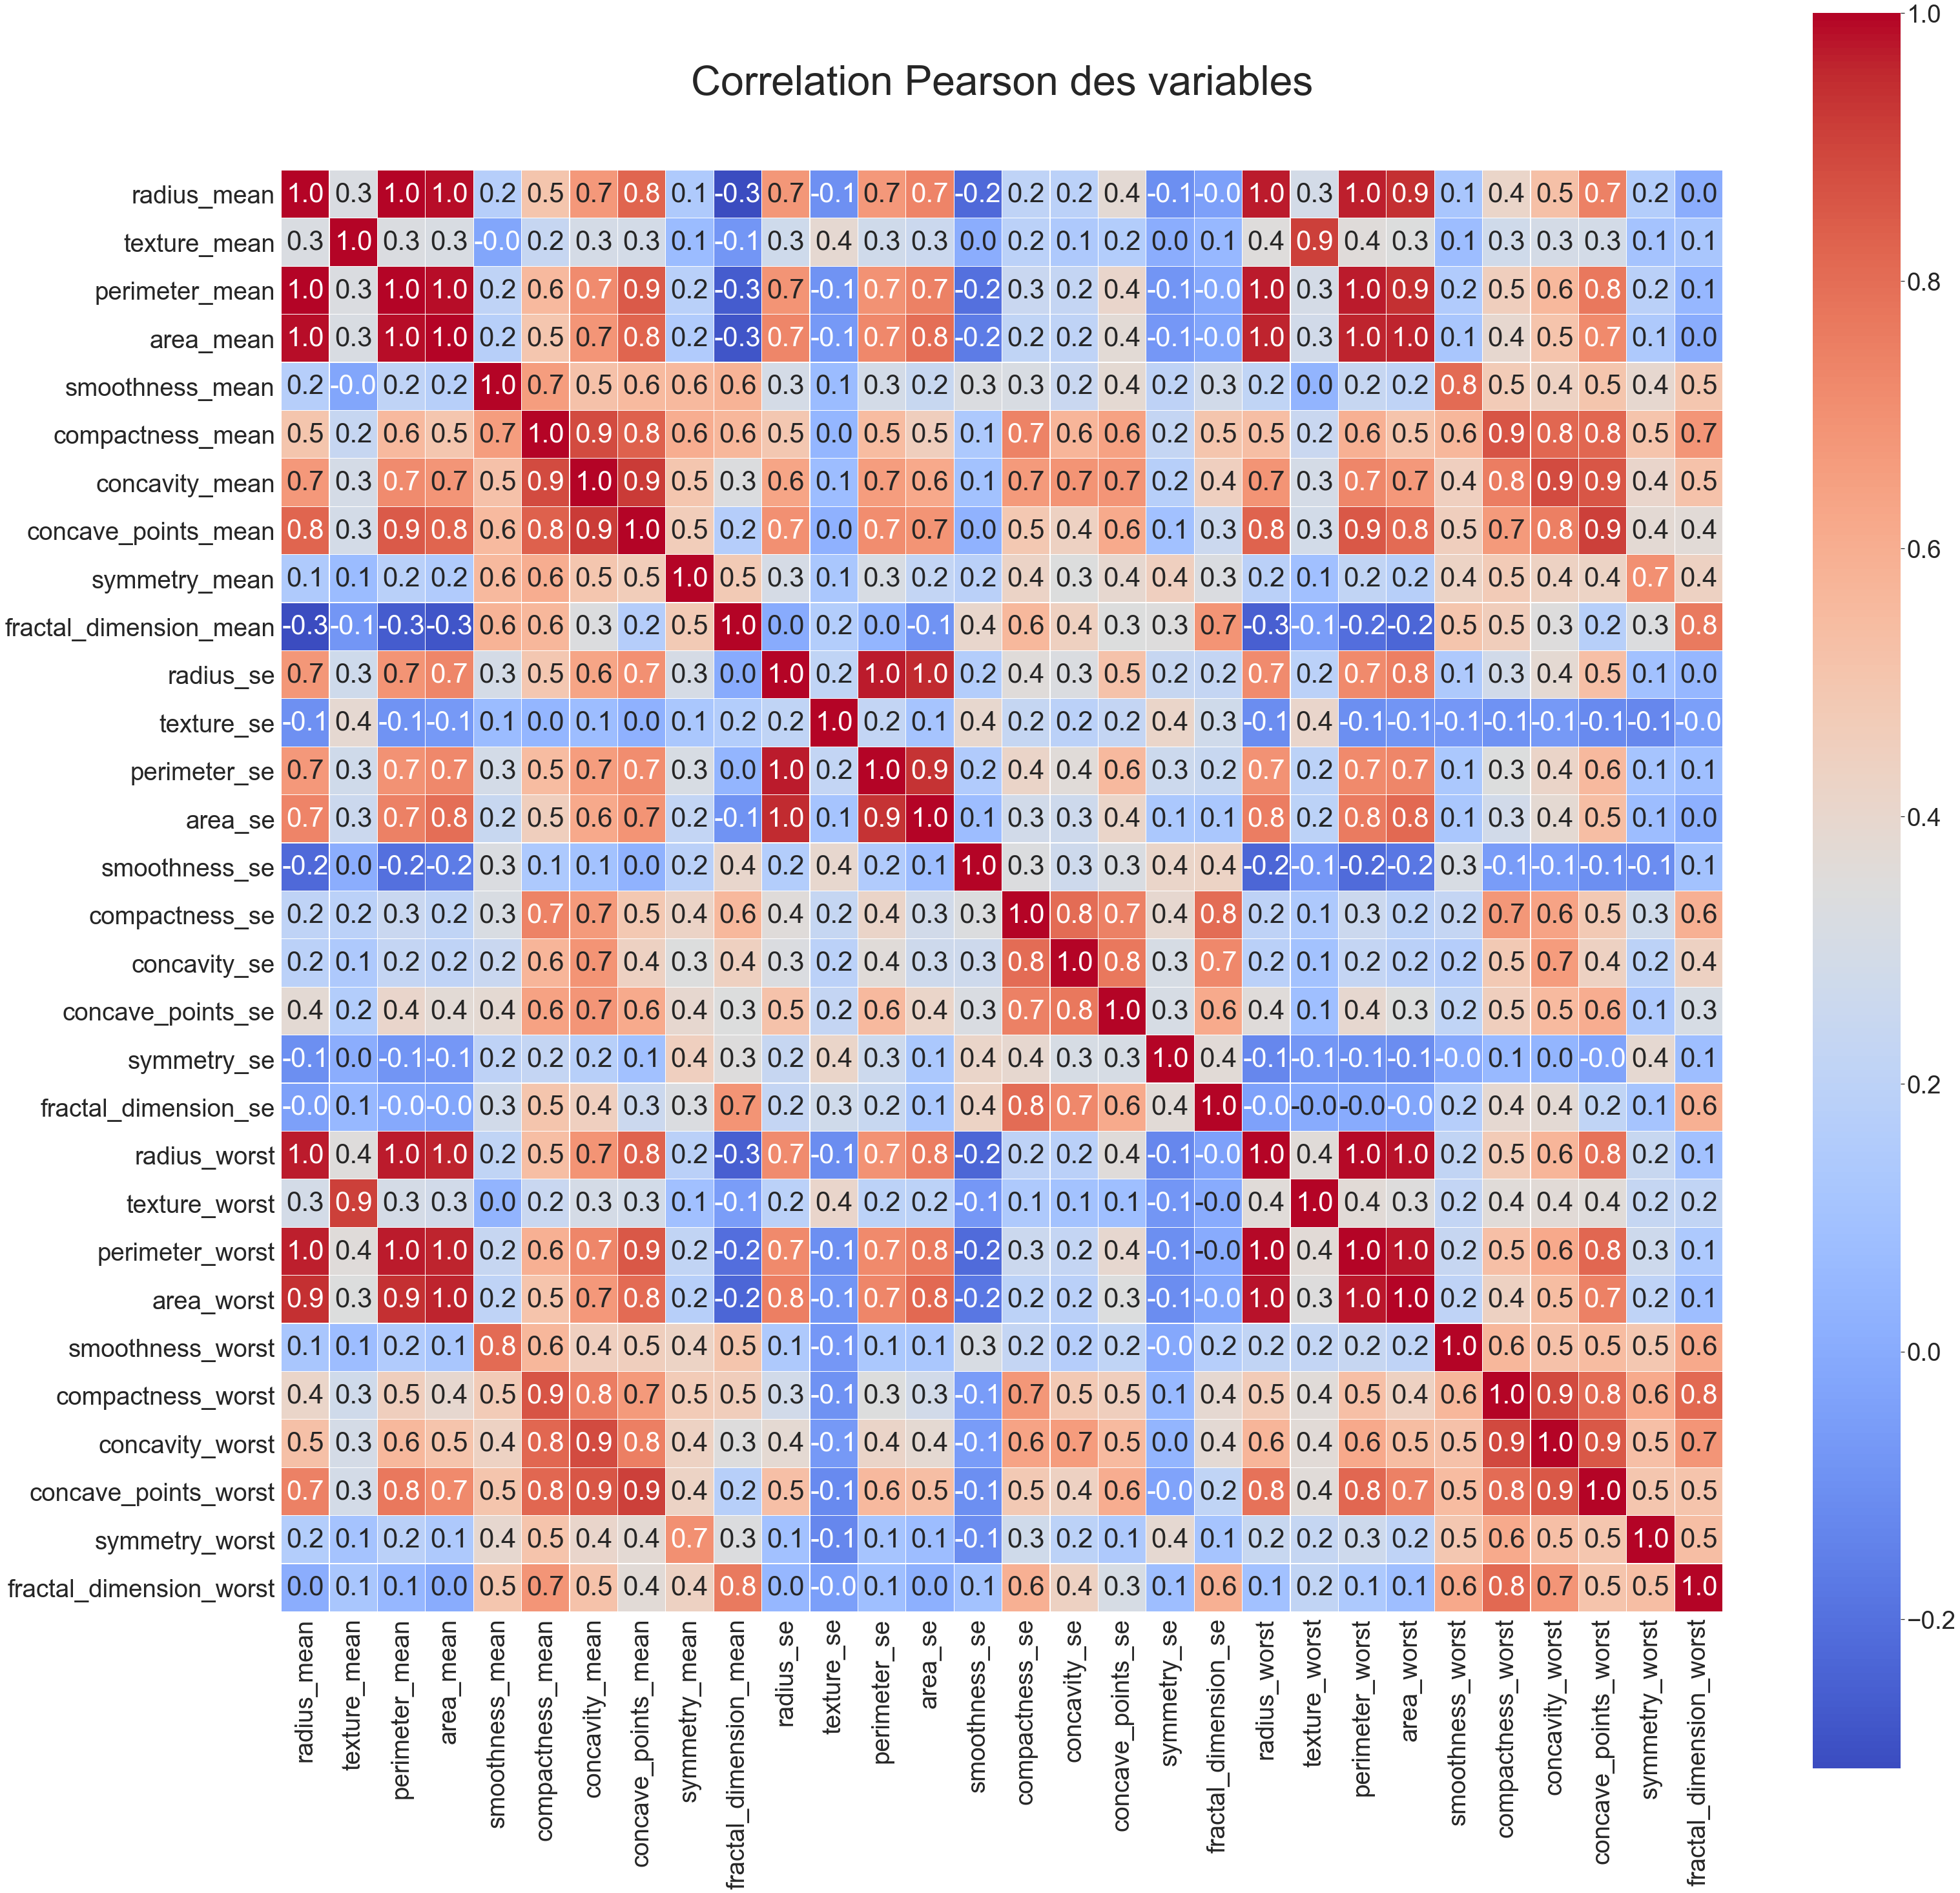

In [10]:
plt.figure(figsize=(50,50))
sns.set(font_scale=3.5)
plt.title('Correlation Pearson des variables', y=1.05, size=64)
sns.heatmap(X.corr(), fmt= '.1f',linewidths=0.3,vmax=1.0, 
            square=True, cmap='coolwarm', linecolor='white', annot=True);
sauvegarderImage('Correlation Pearson des variables')
sns.set(font_scale=2)

# La separation des données pour l'apprentissage

<img src="https://raw.githubusercontent.com/rbizoi/IntelligenceEnDonneesDeSante/main/images/EchantillonApprentissageTest.png" width="800">

In [11]:
X = breastCancer.drop(columns='diagnosis')
y = breastCancer.diagnosis
X_train, X_test, y_train, y_test = train_test_split( X, 
                                                     y, 
                                                     test_size=0.2, 
                                                     random_state=0, 
                                                     stratify = y
                                                   ) 

In [12]:
X_train.shape, X_test.shape

((455, 30), (114, 30))

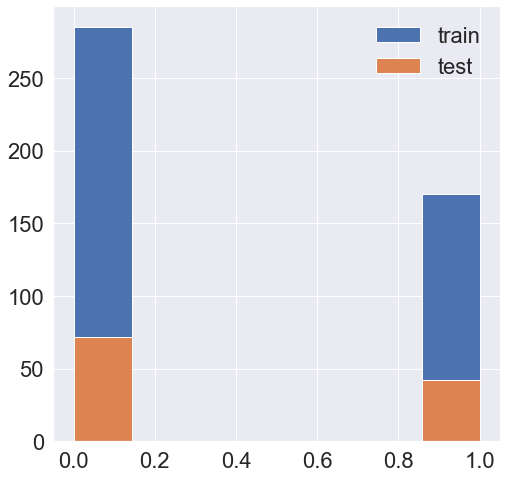

In [13]:
y_train.hist(bins=7, figsize=(8,8), label='train');
y_test.hist(bins=7, figsize=(8,8), label='test');
plt.legend();
sauvegarderImage("La separation des données pour l'apprentissage")

# Le déclaration des classifieurs 

In [14]:

names = [
            'Decision Tree', 
            'Random_Forest',
            'AdaBoost',
            'LightGBM',
            'XGBoost',
        ]

classifiers = [
            DecisionTreeClassifier(max_depth=5),
            RandomForestClassifier(
                max_depth=4,
                max_features=3,
                min_samples_split=4,
                n_estimators=52,
                n_jobs=-1
            ),
            AdaBoostClassifier(n_estimators=52),    
            LGBMClassifier(
                learning_rate=0.1,
                n_estimators=52,
                num_leaves=20,
                reg_alpha=0.1,
                reg_lambda=20,
            ),
            XGBClassifier(
                objective='binary:logistic',
                eval_metric='auc',
                n_estimators=52,
                max_depth=4,
                use_label_encoder=False
            ),
        ]

dictModels = {name:clf for name, clf in zip(names, classifiers)}

In [15]:
dictModels

{'Decision Tree': DecisionTreeClassifier(max_depth=5),
 'Random_Forest': RandomForestClassifier(max_depth=4, max_features=3, min_samples_split=4,
                        n_estimators=52, n_jobs=-1),
 'AdaBoost': AdaBoostClassifier(n_estimators=52),
 'LightGBM': LGBMClassifier(n_estimators=52, num_leaves=20, reg_alpha=0.1, reg_lambda=20),
 'XGBoost': XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
               colsample_bynode=None, colsample_bytree=None, eval_metric='auc',
               gamma=None, gpu_id=None, importance_type='gain',
               interaction_constraints=None, learning_rate=None,
               max_delta_step=None, max_depth=4, min_child_weight=None,
               missing=nan, monotone_constraints=None, n_estimators=52,
               n_jobs=None, num_parallel_tree=None, random_state=None,
               reg_alpha=None, reg_lambda=None, scale_pos_weight=None,
               subsample=None, tree_method=None, use_label_encoder=False,
          

# Le choix des classifieurs 

In [16]:
def choixClassifieurs(X_train, y_train,X_test, y_test, dictModels):
    np.random.seed(123456)
    t0 = time.time()  
    # h = .02  # step size in the mesh
    lw = 1

    plt.figure(figsize=(18,36))
    plt.style.use('seaborn-darkgrid')
    couleurs = sns.hls_palette(len(dictModels.keys()), l=.4, s=.9)
    r_acc,r_aucROC = dict(),dict()
    fauxPositifs, vraisPositifs, probabilites = dict(),dict(),dict()
    accuracy,logloss,hammingloss,precision,sensibilite,f1,jaccard = dict(),dict(),dict(),dict(),dict(),dict(),dict()
    prec, rec, tauxPR, avgPrecRec =  dict(),dict(),dict(),dict()

    for i, nom in enumerate(dictModels):    
        t1 = time.time()  
        dictModels[nom].fit(X_train, y_train)

        y_probas = dictModels[nom].predict_proba(X_test)
        y_pred = dictModels[nom].predict(X_test)
        fauxPositifs[nom], vraisPositifs[nom], probabilites[nom] = roc_curve(y_test.ravel(), y_probas[:, 1])

        r_aucROC[nom]     = auc(fauxPositifs[nom], vraisPositifs[nom])
        accuracy[nom]     = accuracy_score(y_test,y_pred)
        logloss[nom]      = log_loss(y_test,y_pred)
        hammingloss[nom]  = hamming_loss(y_test,y_pred)
        precision[nom]    = precision_score(y_test,y_pred)
        sensibilite[nom]  = recall_score(y_test,y_pred)
        f1[nom]           = f1_score(y_test,y_pred)
        jaccard[nom]      = jaccard_score(y_test,y_pred)


        prec[nom], rec[nom], tauxPR[nom] = precision_recall_curve(y_test.ravel(), y_probas[:, 1])
        avgPrecRec[nom] = average_precision_score(y_test.ravel(), y_probas[:, 1])

        print(f'{nom:21s}'+(' %.4f' % accuracy[nom]).lstrip('0'),end='\t--\t')
        print ("Area under the ROC curve : %0.4f" % r_aucROC[nom],end='\t--\t')
        print('Exécution  :'+('%.2fs' % (time.time() - t1)).lstrip('0'))

        plt.subplot(2, 1, 1)
        plt.plot(fauxPositifs[nom], vraisPositifs[nom], color=couleurs[i], label=nom + '(AUC = %0.4f)' % r_aucROC[nom])

        plt.subplot(2, 1, 2)
        plt.step(rec[nom], prec[nom], where='post', color=couleurs[i], label=f"{nom}(AP = {avgPrecRec[nom]:0.8f})")#alpha=0.8, 
        plt.fill_between(rec[nom], prec[nom], step='post', alpha=0.05)



    plt.subplot(2, 1, 1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('Le taux de faux Positifs-(1 - Spécificité) = VN / (FP + VN)',size=18)
    plt.ylabel('Le taux de vrais positifs-Sensibilité = VP / (VP + FN)',size=18)
    plt.title('La courbe ROC (Receiver Operating Caracteristic)',size=20)
    plt.legend(loc="lower right")    

    plt.subplot(2, 1, 2)
    f1max = 0.90
    f_scores = np.linspace(0.2, f1max, num=7)
    for f_score in f_scores:
        x = np.linspace(0.01, 1)
        y = f_score * x / (2 * x - f_score)
        l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
        plt.annotate('f1={0:0.1f}'.format(f_score), xy=(f1max, y[45] + 0.02))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('Sensibilité(Rappel) = VP / (VP + FN)', size=18)
    plt.ylabel('Précision = VP / (VP + FP)', size=18)      
    plt.title('La courbe Précision-Rappel',size=20)
    plt.legend(loc="lower left")    

    sauvegarderImage("Les courbes ROC et Précision-Rappel")    
    plt.show()

    print('Exécution  :'+('%.2fs' % (time.time() - t0)).lstrip('0'))

    resultat = pd.DataFrame(pd.Series(r_aucROC), columns=["aucROC"])
    resultat['avgPrecRec']     = pd.Series(avgPrecRec   )
    resultat['accuracy']     = pd.Series(accuracy   )
    resultat['f1']           = pd.Series(f1         )
    resultat['precision']    = pd.Series(precision  )
    resultat['sensibilite']  = pd.Series(sensibilite)
    resultat['logloss']      = pd.Series(logloss    )
    resultat['hammingloss']  = pd.Series(hammingloss)
    resultat['jaccard']      = pd.Series(jaccard    )

    resultat.sort_values('f1',ascending=False, inplace=True)
    return resultat

Decision Tree         0.9123	--	Area under the ROC curve : 0.8899	--	Exécution  :.01s
Random_Forest         0.9474	--	Area under the ROC curve : 0.9825	--	Exécution  :.08s
AdaBoost              0.9561	--	Area under the ROC curve : 0.9914	--	Exécution  :.11s
LightGBM              0.9298	--	Area under the ROC curve : 0.9873	--	Exécution  :.02s
XGBoost               0.9649	--	Area under the ROC curve : 0.9891	--	Exécution  :.06s


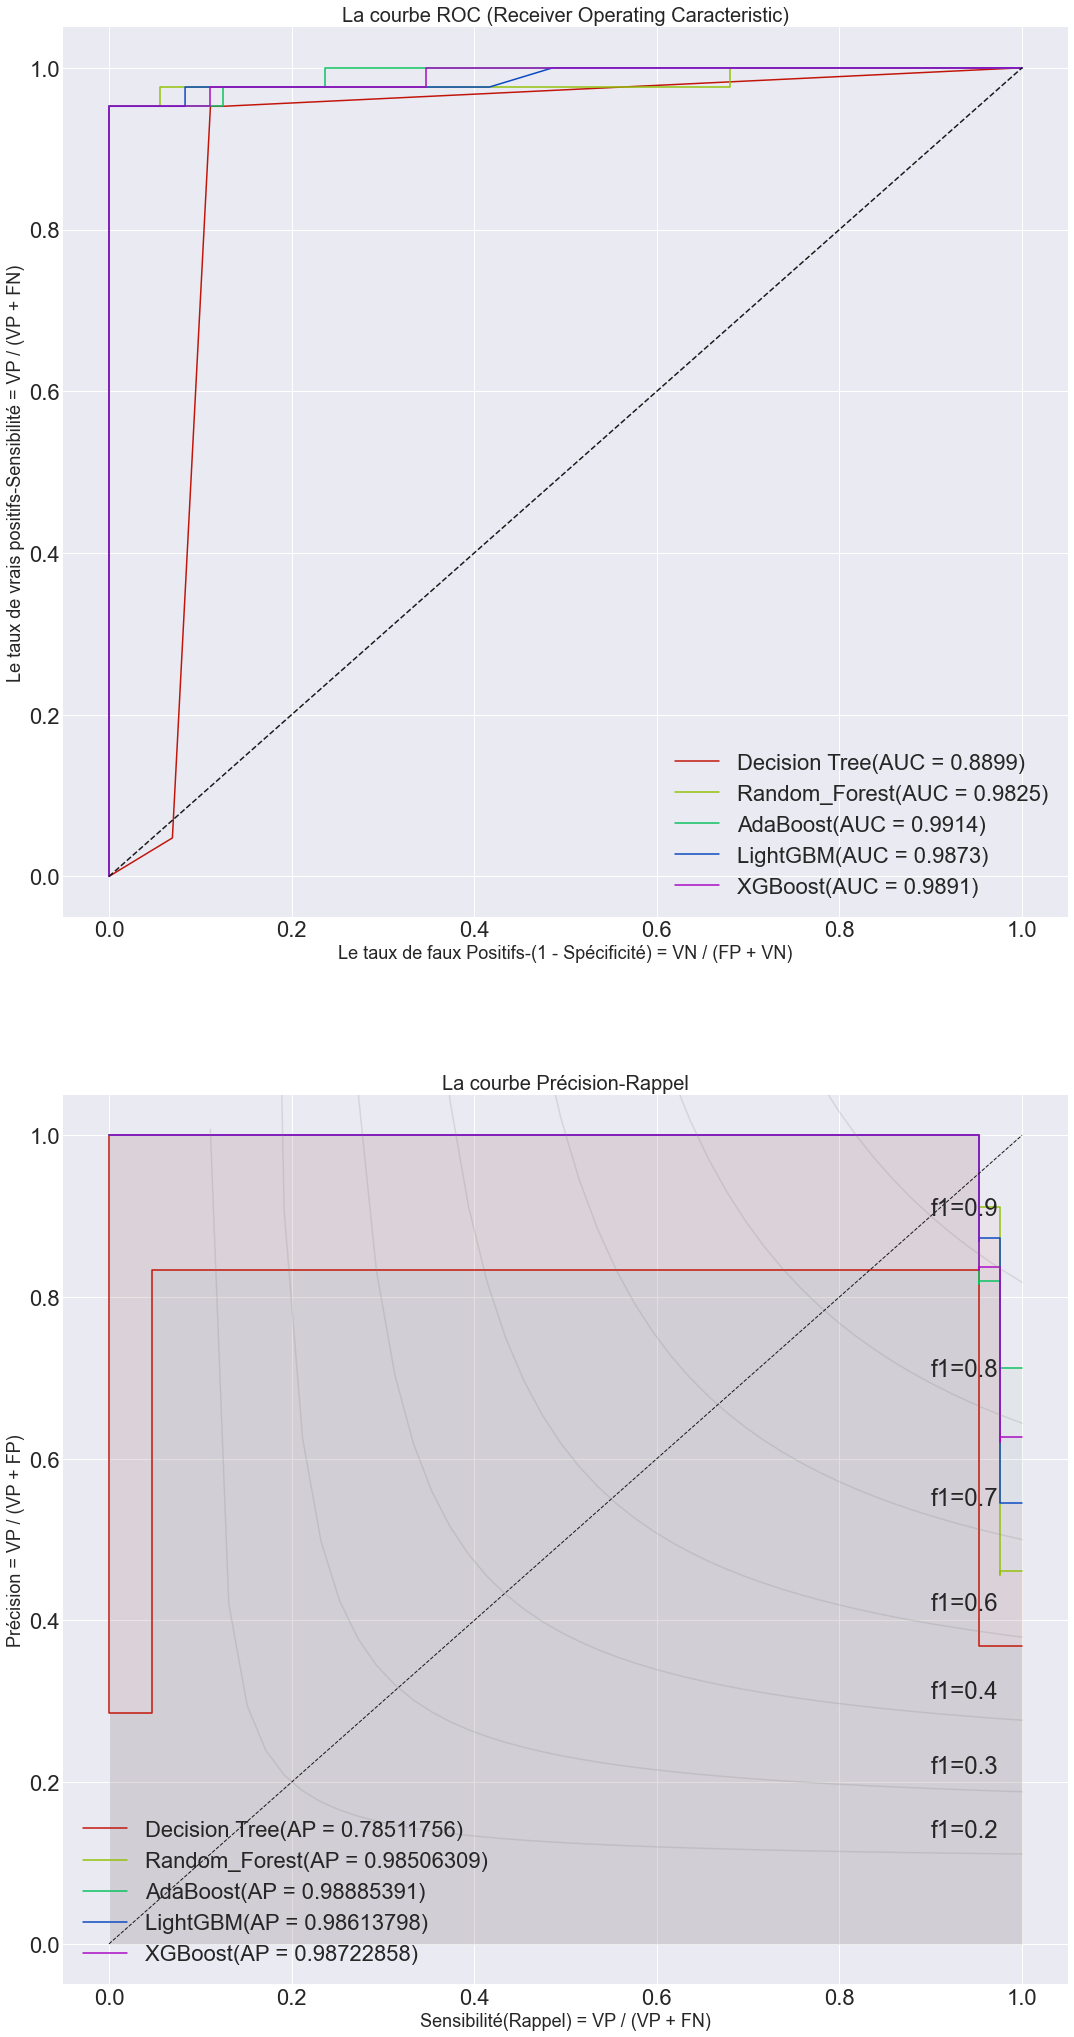

Exécution  :10.10s


In [17]:
resultatsBase = choixClassifieurs(X_train, y_train,X_test, y_test, dictModels)

In [18]:
resultatsBase

,aucROC,avgPrecRec,accuracy,f1,precision,sensibilite,logloss,hammingloss,jaccard
XGBoost,0.989087,0.987229,0.964912,0.952381,0.952381,0.952381,1.211901,0.035088,0.909091
AdaBoost,0.991402,0.988854,0.956140,0.941176,0.930233,0.952381,1.514880,0.043860,0.888889
Random_Forest,0.982474,0.985063,0.947368,0.931818,0.891304,0.976190,1.817865,0.052632,0.872340
LightGBM,0.987269,0.986138,0.929825,0.909091,0.869565,0.952381,2.423816,0.070175,0.833333
Decision Tree,0.889881,0.785118,0.912281,0.888889,0.833333,0.952381,3.029773,0.087719,0.800000


In [19]:
resultatsBase['execution'] = 'base'
resultatsTotal = resultatsBase.copy()

# L'ajout des variables

In [20]:
donnees_ft = breastCancer.copy()
donnees_ft['radiusWQ'] = pd.qcut(donnees_ft.radius_worst - donnees_ft.radius_se,100,labels=False)
donnees_ft['perimeterWQ'] = pd.qcut(donnees_ft.perimeter_worst - donnees_ft.perimeter_se,100,labels=False)
donnees_ft['areaWQ'] = pd.qcut(donnees_ft.area_worst - donnees_ft.area_se,100,labels=False)

donnees_ft['smoothnessWQ'] = pd.qcut(donnees_ft.smoothness_worst - donnees_ft.smoothness_se,100,labels=False)

donnees_ft['textureWQ'] = pd.qcut(donnees_ft.texture_worst - donnees_ft.texture_se,100,labels=False)

donnees_ft['compactnessWQ'] = pd.qcut(donnees_ft.compactness_worst - donnees_ft.compactness_se,100,labels=False)

donnees_ft['calc_sup01'] = donnees_ft.radius_worst * \
                           donnees_ft.smoothness_worst * \
                           donnees_ft.concave_points_worst * \
                           donnees_ft.fractal_dimension_worst * \
                           donnees_ft.texture_worst / \
                           (donnees_ft.compactness_worst + donnees_ft.symmetry_worst)
                    
donnees_ft['calc_sup02'] = donnees_ft.radius_worst * \
                           donnees_ft.smoothness_worst * \
                           donnees_ft.concave_points_worst * \
                           donnees_ft.fractal_dimension_worst * \
                           donnees_ft.texture_worst / \
                           (donnees_ft.compactness_worst + donnees_ft.symmetry_worst)
donnees_ft['calc_sup03'] = donnees_ft.area_worst * \
                           donnees_ft.smoothness_worst * \
                           donnees_ft.concave_points_worst * \
                           donnees_ft.fractal_dimension_worst * \
                           donnees_ft.texture_worst / \
                           (donnees_ft.compactness_worst + donnees_ft.symmetry_worst)
donnees_ft['calc_sup04'] = donnees_ft.area_worst * \
                           donnees_ft.smoothness_worst * \
                           donnees_ft.concave_points_worst * \
                           donnees_ft.fractal_dimension_worst * \
                           donnees_ft.texture_worst
donnees_ft['calc_sup05'] = (donnees_ft.compactness_worst + donnees_ft.symmetry_worst)

In [21]:
X = donnees_ft.drop(columns='diagnosis').copy()
y = donnees_ft.diagnosis.copy()

X_train, X_test, y_train, y_test = train_test_split( X, 
                                                     y, 
                                                     test_size=0.2, 
                                                     random_state=0, 
                                                     stratify = y
                                                   ) 

Decision Tree         0.9474	--	Area under the ROC curve : 0.9557	--	Exécution  :.01s
Random_Forest         0.9561	--	Area under the ROC curve : 0.9891	--	Exécution  :.11s
AdaBoost              0.9737	--	Area under the ROC curve : 0.9947	--	Exécution  :.14s
LightGBM              0.9649	--	Area under the ROC curve : 0.9937	--	Exécution  :.03s
XGBoost               0.9561	--	Area under the ROC curve : 0.9947	--	Exécution  :.07s


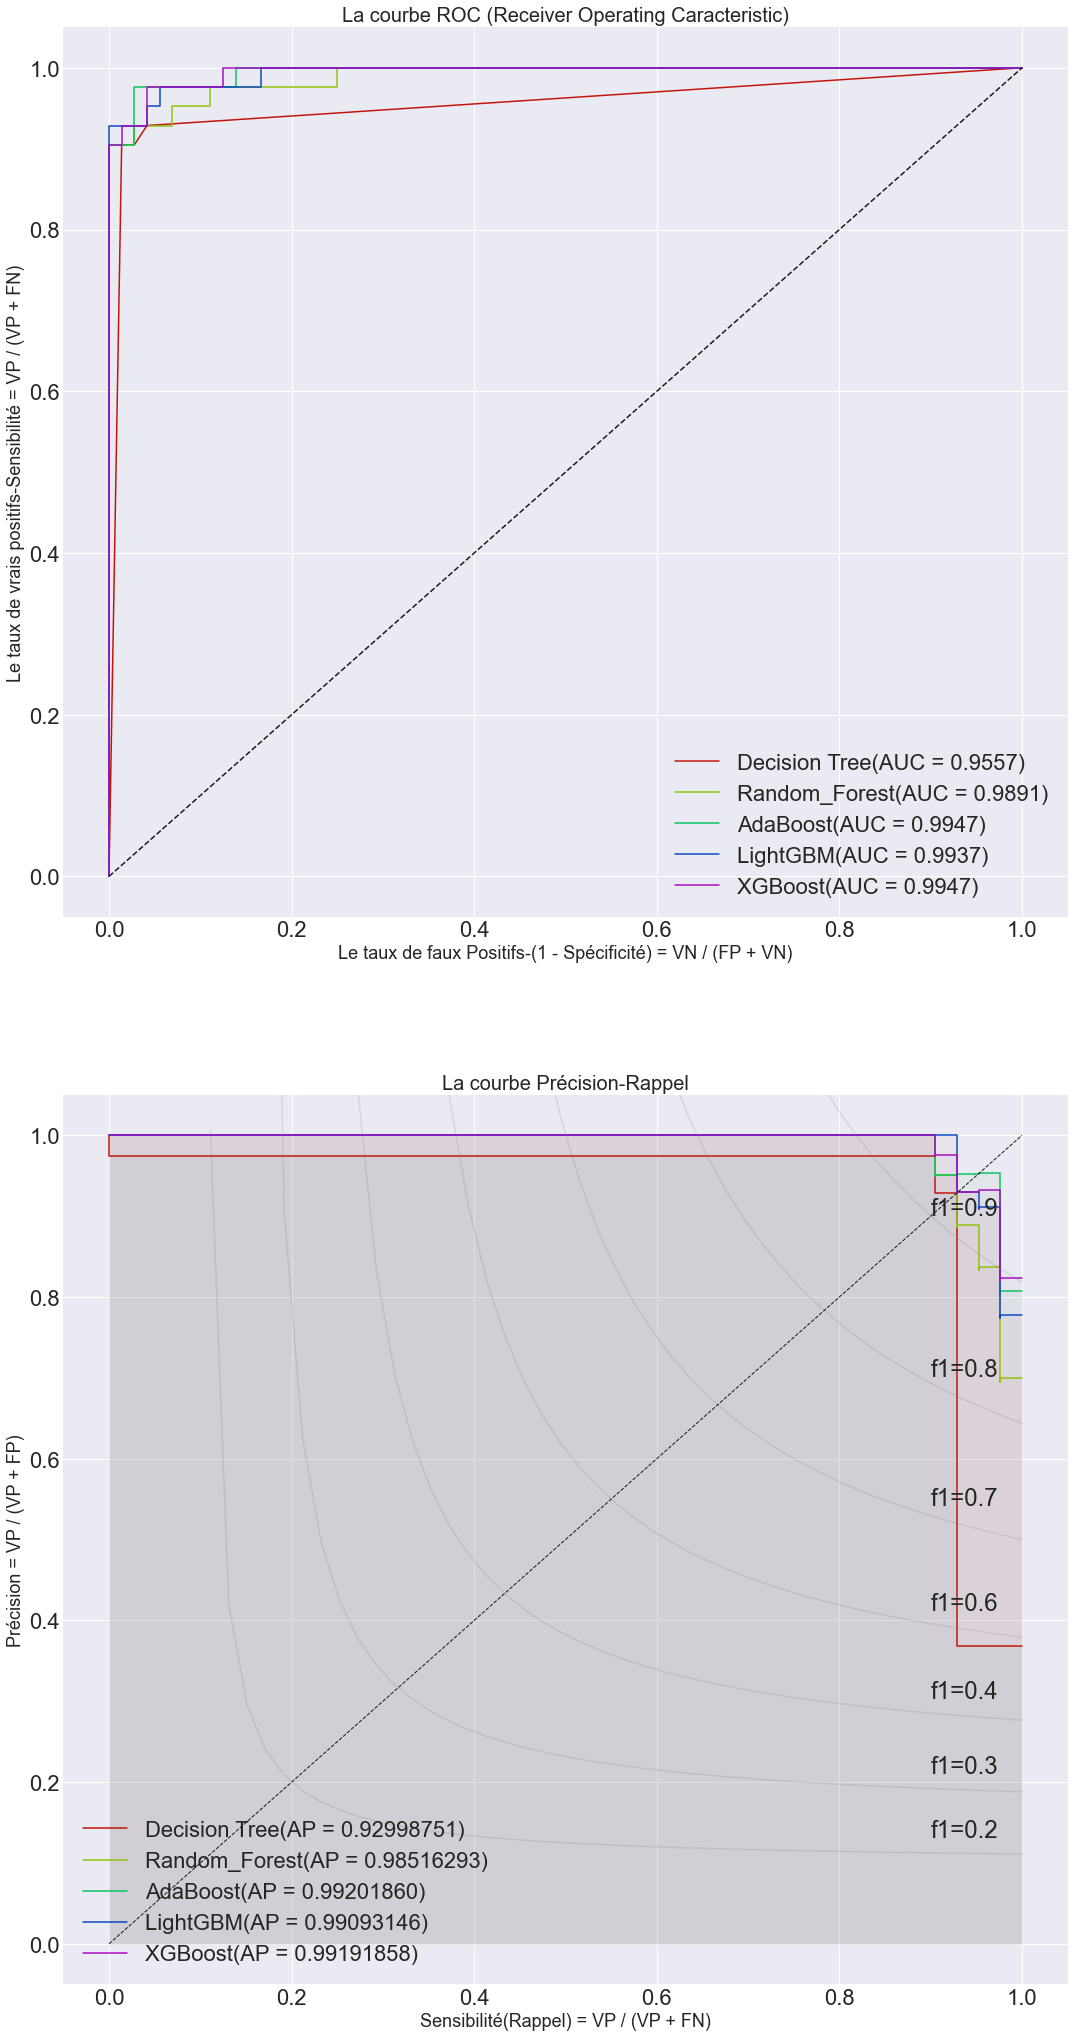

Exécution  :9.91s


In [22]:
resultatsFeatures = choixClassifieurs(X_train, y_train,X_test, y_test, dictModels)

In [23]:
resultatsFeatures['execution'] = 'features'
resultatsTotal = pd.concat([resultatsTotal, resultatsFeatures.copy()], axis=0)

In [24]:
resultatsTotal.sort_values('f1',ascending=False).head(10)

,aucROC,avgPrecRec,accuracy,f1,precision,sensibilite,logloss,hammingloss,jaccard,execution
AdaBoost,0.994709,0.992019,0.973684,0.964706,0.953488,0.976190,0.908929,0.026316,0.931818,features
XGBoost,0.989087,0.987229,0.964912,0.952381,0.952381,0.952381,1.211901,0.035088,0.909091,base
LightGBM,0.993717,0.990931,0.964912,0.950000,1.000000,0.904762,1.211887,0.035088,0.904762,features
AdaBoost,0.991402,0.988854,0.956140,0.941176,0.930233,0.952381,1.514880,0.043860,0.888889,base
Random_Forest,0.989087,0.985163,0.956140,0.939759,0.951220,0.928571,1.514873,0.043860,0.886364,features
XGBoost,0.994709,0.991919,0.956140,0.939759,0.951220,0.928571,1.514873,0.043860,0.886364,features
Random_Forest,0.982474,0.985063,0.947368,0.931818,0.891304,0.976190,1.817865,0.052632,0.872340,base
Decision Tree,0.955688,0.929988,0.947368,0.926829,0.950000,0.904762,1.817844,0.052632,0.863636,features
LightGBM,0.987269,0.986138,0.929825,0.909091,0.869565,0.952381,2.423816,0.070175,0.833333,base
Decision Tree,0.889881,0.785118,0.912281,0.888889,0.833333,0.952381,3.029773,0.087719,0.800000,base


# Le traitement des outliers

In [44]:
from sklearn.neighbors  import LocalOutlierFactor
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble   import IsolationForest
from sklearn.svm        import OneClassSVM

contamination = 0.2
nbModels      = 4
classifieursOutilers = \
                {'LocalOutlierFactor': LocalOutlierFactor(contamination=contamination, novelty=True, n_jobs=-1),
                 'IsolationForest'   : IsolationForest   (contamination=contamination, n_jobs=-1),
                 'OneClassSVM'       : OneClassSVM       (nu=contamination),
                 'EllipticEnvelope'  : EllipticEnvelope  (contamination=contamination)}

indexFinal = np.zeros(X_train.shape[0])
for nom in classifieursOutilers:
    classifieursOutilers[nom].fit(X_train)
    indexFinal += (classifieursOutilers[nom].predict(X_train) - 1) / 2
    
indexOutiliers = pd.Series(indexFinal, index=X_train.index).apply(lambda x: -1 if abs(x) >= nbModels else 1)    
X_train = X_train[indexOutiliers != -1]
y_train = y_train[indexOutiliers != -1]

Decision Tree         0.9474	--	Area under the ROC curve : 0.9557	--	Exécution  :.02s
Random_Forest         0.9561	--	Area under the ROC curve : 0.9911	--	Exécution  :.09s
AdaBoost              0.9737	--	Area under the ROC curve : 0.9947	--	Exécution  :.13s
LightGBM              0.9649	--	Area under the ROC curve : 0.9911	--	Exécution  :.03s
XGBoost               0.9474	--	Area under the ROC curve : 0.9947	--	Exécution  :.07s


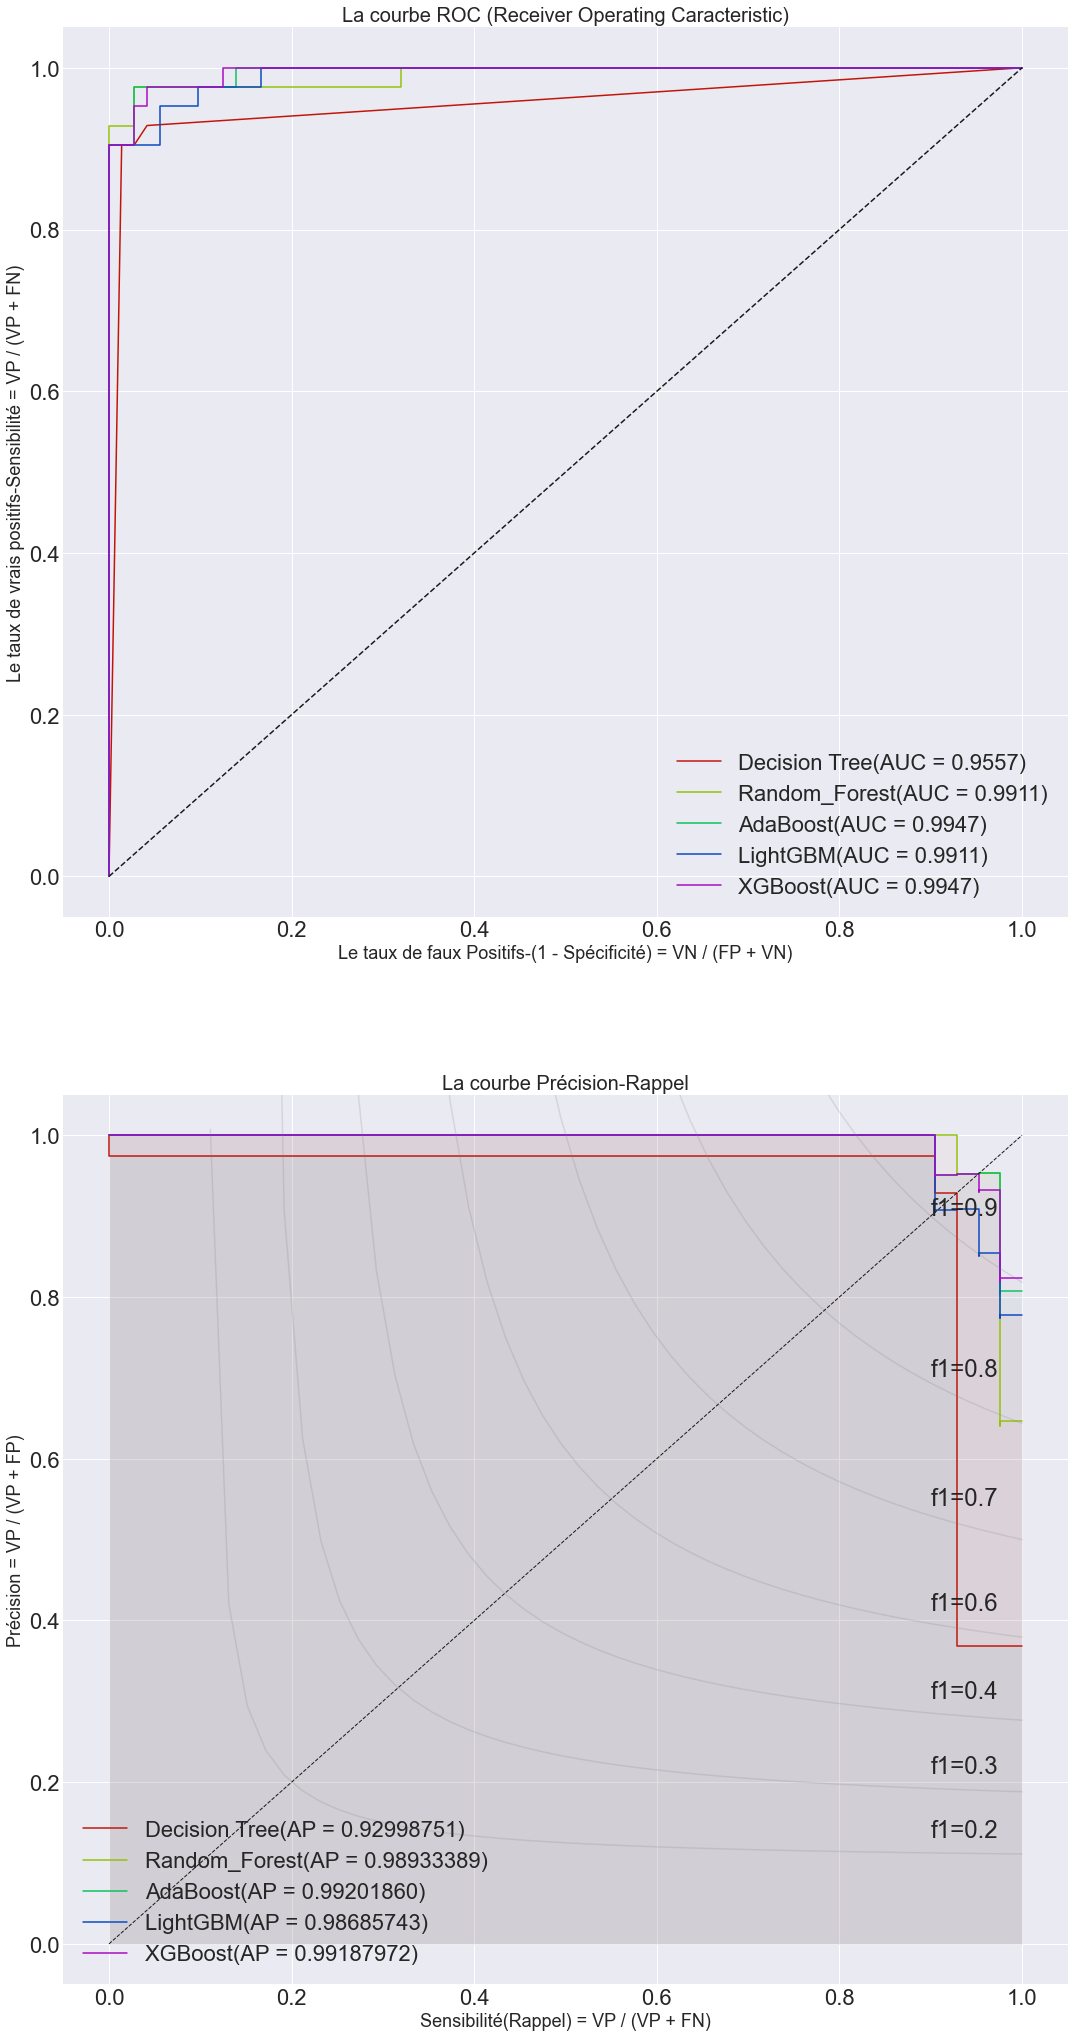

Exécution  :9.66s


In [45]:
resultatsOutliers = choixClassifieurs(X_train, y_train,X_test, y_test, dictModels)

In [46]:
resultatsOutliers['execution'] = 'outliers'
resultatsTotal = pd.concat([resultatsTotal, resultatsOutliers.copy()], axis=0)

In [47]:
resultatsTotal.sort_values('f1',ascending=False).head(10)

,aucROC,avgPrecRec,accuracy,f1,precision,sensibilite,logloss,hammingloss,jaccard,execution
AdaBoost,0.994709,0.992019,0.973684,0.964706,0.953488,0.976190,0.908929,0.026316,0.931818,features
AdaBoost,0.994709,0.992019,0.973684,0.964706,0.953488,0.976190,0.908929,0.026316,0.931818,outliers
XGBoost,0.989087,0.987229,0.964912,0.952381,0.952381,0.952381,1.211901,0.035088,0.909091,base
LightGBM,0.993717,0.990931,0.964912,0.950000,1.000000,0.904762,1.211887,0.035088,0.904762,features
LightGBM,0.991071,0.986857,0.964912,0.950000,1.000000,0.904762,1.211887,0.035088,0.904762,outliers
AdaBoost,0.991402,0.988854,0.956140,0.941176,0.930233,0.952381,1.514880,0.043860,0.888889,base
Random_Forest,0.989087,0.985163,0.956140,0.939759,0.951220,0.928571,1.514873,0.043860,0.886364,features
XGBoost,0.994709,0.991919,0.956140,0.939759,0.951220,0.928571,1.514873,0.043860,0.886364,features
Random_Forest,0.991071,0.989334,0.956140,0.939759,0.951220,0.928571,1.514873,0.043860,0.886364,outliers
Random_Forest,0.982474,0.985063,0.947368,0.931818,0.891304,0.976190,1.817865,0.052632,0.872340,base


In [ ]:
# 

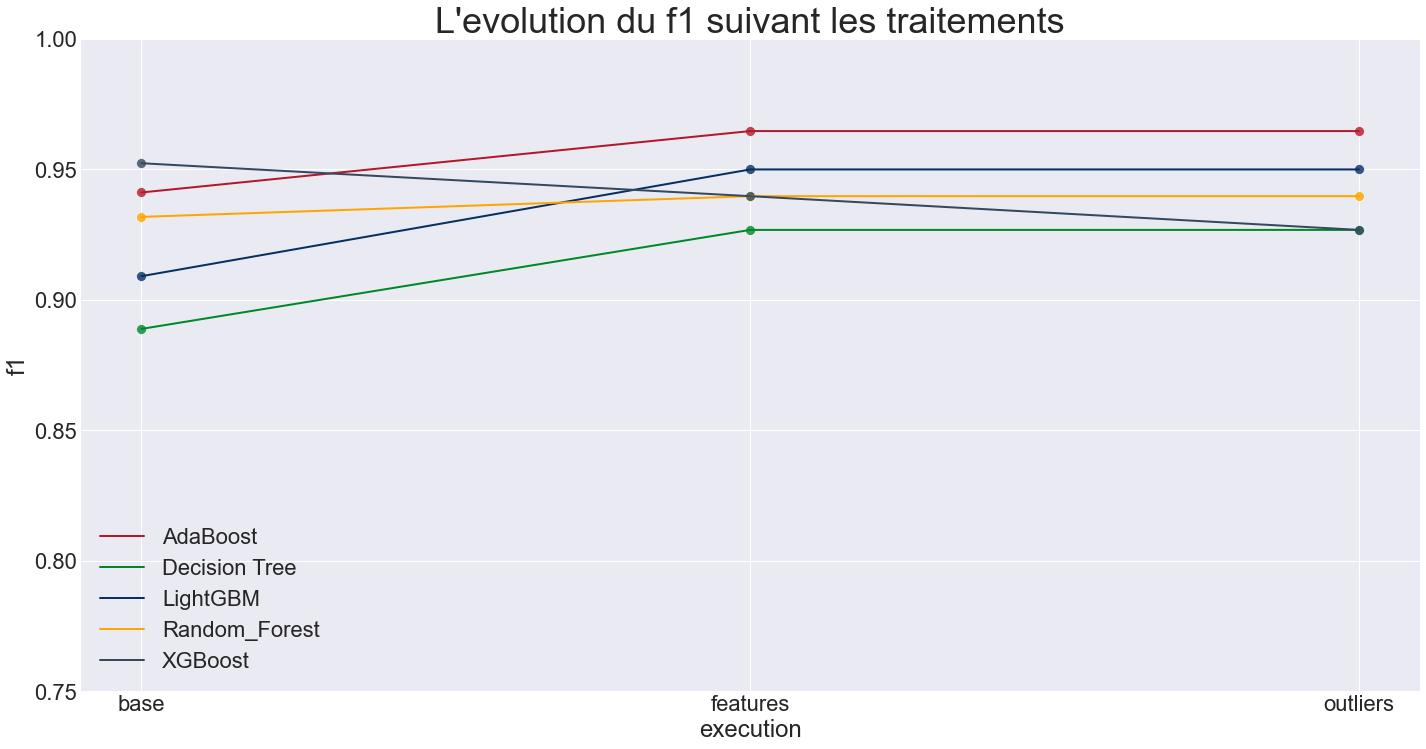

In [48]:
fig, ax = plt.subplots(figsize=(24,12))
for i, nom in enumerate(resultatsTotal.reset_index()['index'].sort_values().unique()):
    graph = sns.lineplot( x         = 'execution', 
                          y         = 'f1', 
                          data      = resultatsTotal.loc[nom], 
                          estimator = None, 
                          lw        = 2, 
                          ci        = None,
                          label     = nom,
                          color     = paletteA[i],
                          ax        = ax)
    sns.scatterplot( x     = 'execution', 
                     y     = 'f1', 
                     data  = resultatsTotal.loc[nom], 
                     alpha = 0.8,   
                     s     = 100,
                     ci    = None, 
                     color = paletteA[i],
                     ax    = ax,);
ax.set_title("L'evolution du f1 suivant les traitements",fontsize = 36);    
ax.set(ylim=(0.75,1));
sauvegarderImage("L'evolution du f1 suivant les traitements")    